# Application of PPI for CT on the Donepezil

## Imports

In [1]:
import numpy as np
import torch
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns

import estimators

# Hippocampe study

This is the data from the Hippocampus study, where the Donepezil was used to reduce the rate of atrophy of the hippocampus in Alzheimer's disease. The clinical trial was conducted by Eisai and had the annualized percentage change (APC) of total hippocampal volume as primary endpoint.

## 1. Data analysis

In [2]:
data_path = "..."
files = os.listdir(os.path.join(data_path, "clean"))
csv_files = [file for file in files if file[-4:]==".csv"]
print(csv_files)
data_dict = {}
for file in csv_files:
    name = file[:-4]
    if name != "DATA_DICTIONARY":
        data_dict[name] = pd.read_csv(os.path.join(data_path, "clean", file), sep=",", 
                                      index_col=['ID','TIME'] if name != "Cofactors" else 'ID')

['Cofactors.csv', 'MMSE.csv', 'MRI.csv', 'Visit.csv', 'DATA_DICTIONARY.csv', 'ADAS.csv']


In [3]:
data_dict['Cofactors']

,SEX,BIRTHDAY,ARM
ID,,,
_01_01_BOF,Female,1946-02-14,NaN
_01_02_BEM,Female,1944-07-29,placebo
_01_03_SIJ,Female,1928-01-19,NaN
_01_04_ARH,Female,1937-09-14,NaN
_01_05_PIT,Female,1935-08-11,NaN
...,...,...,...
_29_01_SEE,Female,1937-08-09,donepezil
_29_02_SUJ,Female,1945-01-08,NaN
_30_01_BRR,Male,1926-03-06,donepezil


In [4]:
data_dict['MRI']

MES_MRI_SACHA_VENTRICLES_WB  MES_MRI_SACHA_HIPPOCAMPUS_WB  \
ID         TIME                                                                
_01_02_BEM 62.971                     0.017450                      0.004928   
           63.970                     0.019337                      0.004848   
_01_09_KAC 80.860                     0.059889                      0.004971   
           81.859                     0.062065                      0.005081   
_01_12_SUT 71.116                     0.050951                      0.005574   
...                                        ...                           ...   
_29_01_SEE 72.821                     0.027732                      0.005752   
_30_01_BRR 83.280                     0.064572                      0.004672   
           84.279                     0.065354                      0.004564   
_30_02_TAD 71.023                          NaN                           NaN   
_30_03_ROY 77.930                          NaN                           NaN   

                   MES_MRI_SACHA_HIPPOCAMPUS_VOL  \
ID         TIME                                    
_01_02_BEM 62.971                         6430.0   
           63.970                         6279.0   
_01_09_KAC 80.860                         4226.5   
           81.859                         4279.0   
_01_12_SUT 71.116                         4839.5   
...                                          ...   
_29_01_SEE 72.821                         5285.5   
_30_01_BRR 83.280                         4566.0   
           84.279                         4461.5   
_30_02_TAD 71.023                            NaN   
_30_03_ROY 77.930                            NaN   

                   MES_MRI_SACHA_VENTRICLES_VOL  MES_MRI_SACHA_WHOLEBRAIN_VOL  \
ID         TIME                                                                 
_01_02_BEM 62.971                     22767.200                    1304720.00   
           63.970                     25043.850                    1295152.10   
_01_09_KAC 80.860                     50924.600                     850310.00   
           81.859                     52263.820                     842078.18   
_01_12_SUT 71.116                     44234.600                     868180.00   
...                                         ...                           ...   
_29_01_SEE 72.821                     25484.640                     918950.15   
_30_01_BRR 83.280                     63103.700                     977254.00   
           84.279                     63890.903                     977611.96   
_30_02_TAD 71.023                           NaN                           NaN   
_30_03_ROY 77.930                           NaN                           NaN   

                   MES_MRI_FREESURFER_VENTRICLES_ICV  \
ID         TIME                                        
_01_02_BEM 62.971                           0.011054   
           63.970                           0.012139   
_01_09_KAC 80.860                           0.032622   
           81.859                           0.033955   
_01_12_SUT 71.116                           0.032868   
...                                              ...   
_29_01_SEE 72.821                           0.019679   
_30_01_BRR 83.280                           0.037302   
           84.279                           0.038095   
_30_02_TAD 71.023                           0.034276   
_30_03_ROY 77.930                           0.019350   

                   MES_MRI_FREESURFER_HIPPOCAMPUS_ICV  \
ID         TIME                                         
_01_02_BEM 62.971                            0.004738   
           63.970                            0.004637   
_01_09_KAC 80.860                            0.003703   
           81.859                            0.003937   
_01_12_SUT 71.116                            0.004776   
...                                               ...   
_29_01_SEE 72.821                            0.005938   
_30_0

In [5]:
data_dict['Cofactors']['ARM'].value_counts()

donepezil    112
placebo      103
Name: ARM, dtype: int64

---------------------------------------- 
 MES_MRI_SACHA_VENTRICLES_WB
----------------------------------------
Treated arm                                                            Placebo


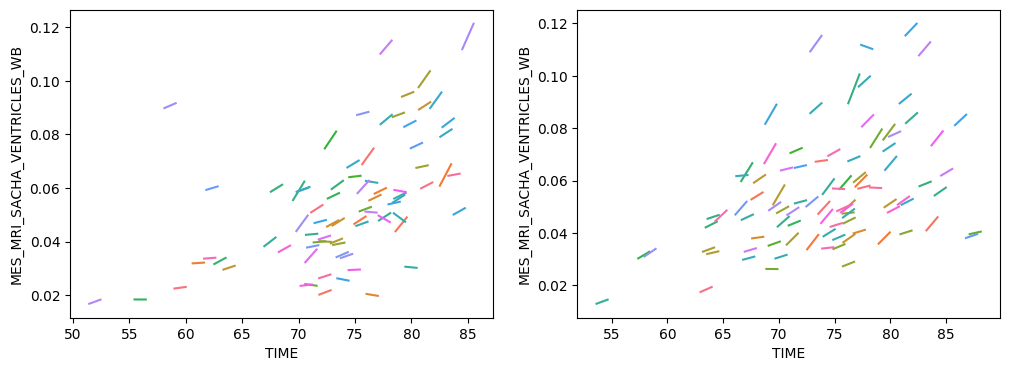

---------------------------------------- 
 MES_MRI_SACHA_HIPPOCAMPUS_WB
----------------------------------------
Treated arm                                                            Placebo


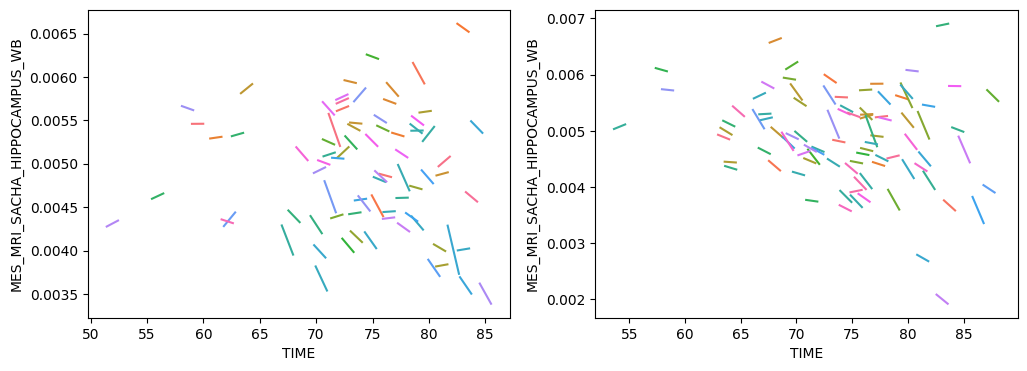

---------------------------------------- 
 MES_MRI_SACHA_HIPPOCAMPUS_VOL
----------------------------------------
Treated arm                                                            Placebo


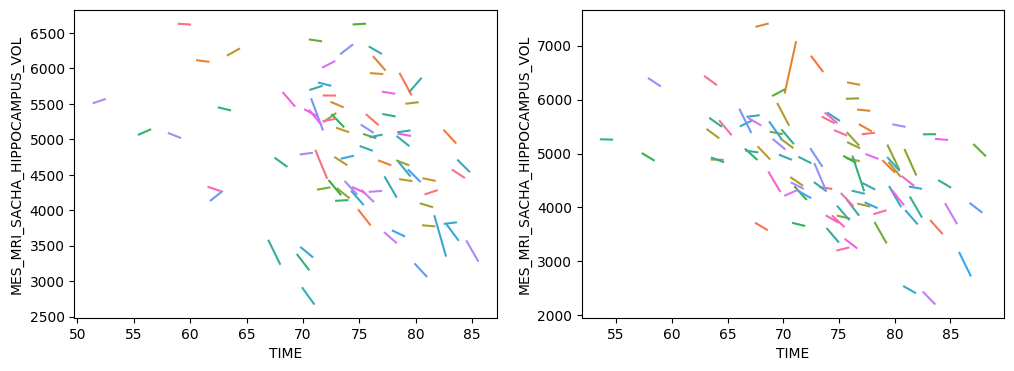

---------------------------------------- 
 MES_MRI_SACHA_VENTRICLES_VOL
----------------------------------------
Treated arm                                                            Placebo


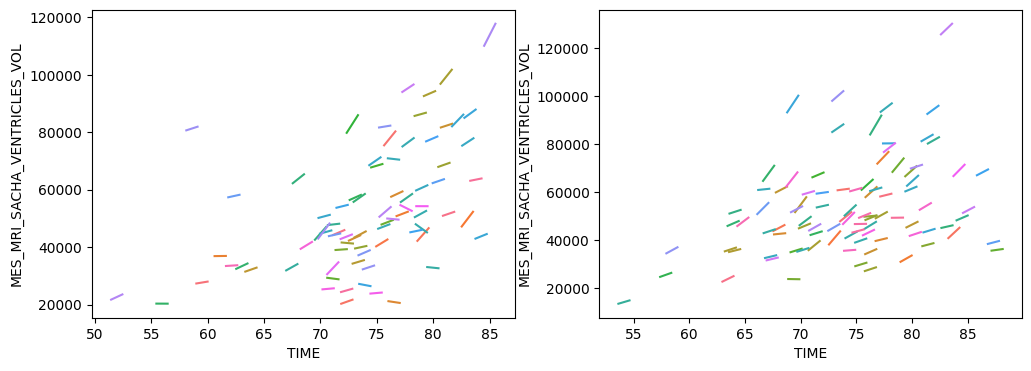

---------------------------------------- 
 MES_MRI_SACHA_WHOLEBRAIN_VOL
----------------------------------------
Treated arm                                                            Placebo


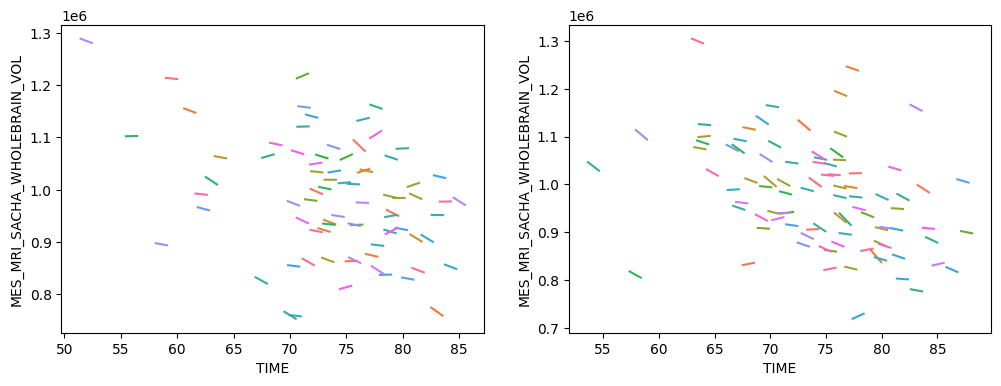

---------------------------------------- 
 MES_MRI_FREESURFER_VENTRICLES_ICV
----------------------------------------
Treated arm                                                            Placebo


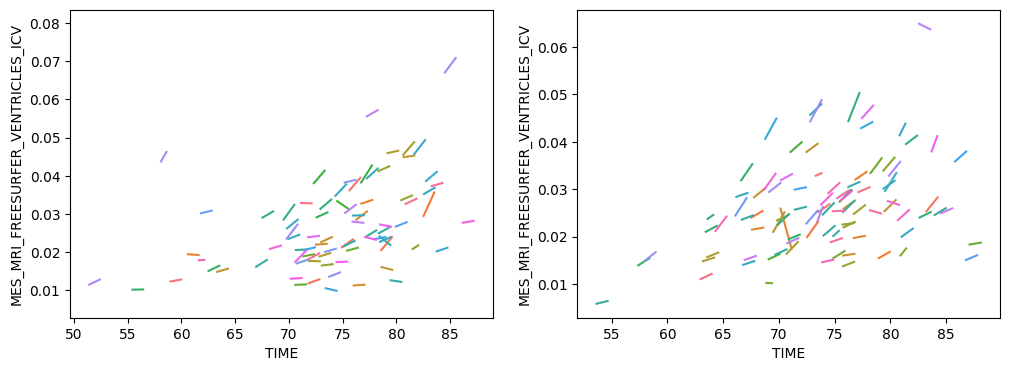

---------------------------------------- 
 MES_MRI_FREESURFER_HIPPOCAMPUS_ICV
----------------------------------------
Treated arm                                                            Placebo


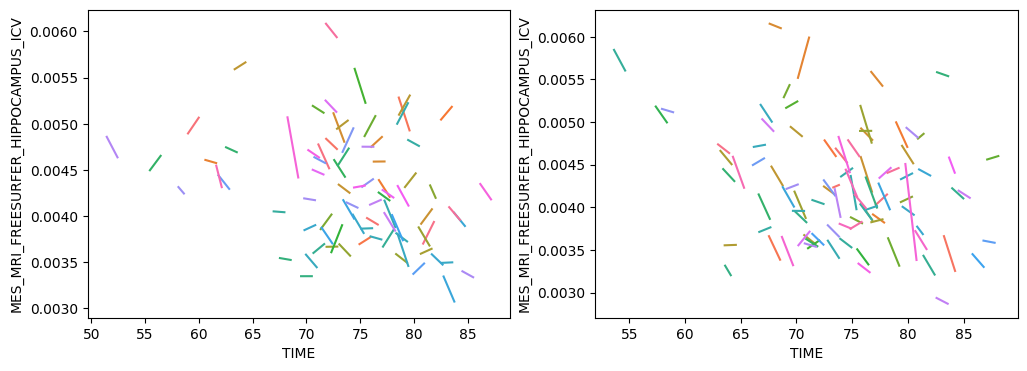

---------------------------------------- 
 MES_MRI_FREESURFER_HIPPOCAMPUS_VOL
----------------------------------------
Treated arm                                                            Placebo


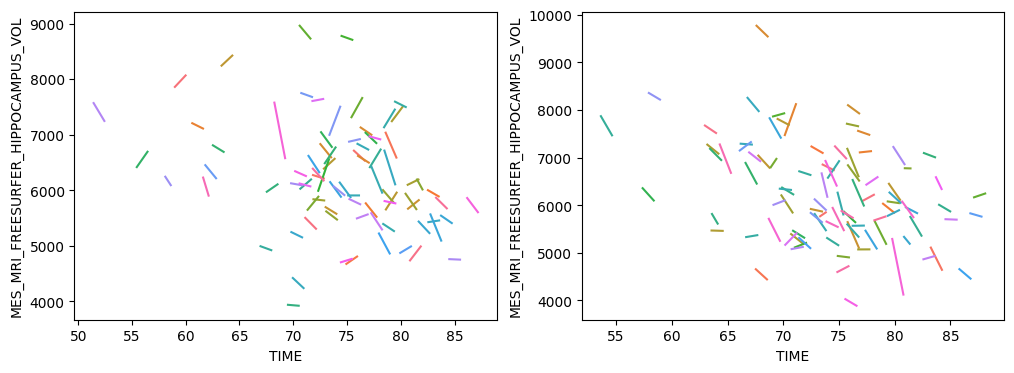

---------------------------------------- 
 MES_MRI_FREESURFER_VENTRICLES_VOL
----------------------------------------
Treated arm                                                            Placebo


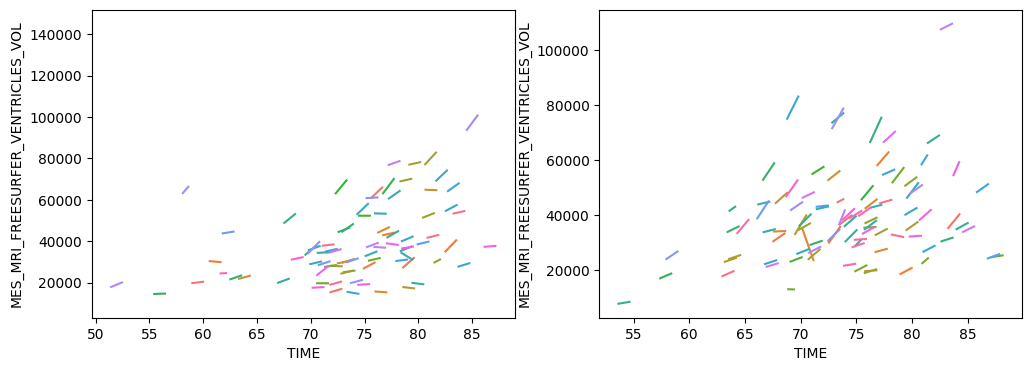

---------------------------------------- 
 MES_MRI_FREESURFER_ICV_VOL
----------------------------------------
Treated arm                                                            Placebo


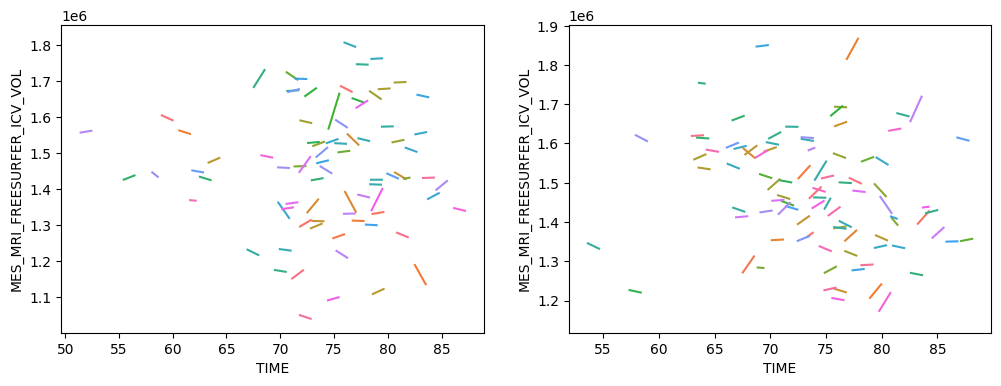

---------------------------------------- 
 MMSE_TOTAL
----------------------------------------
Treated arm                                                            Placebo


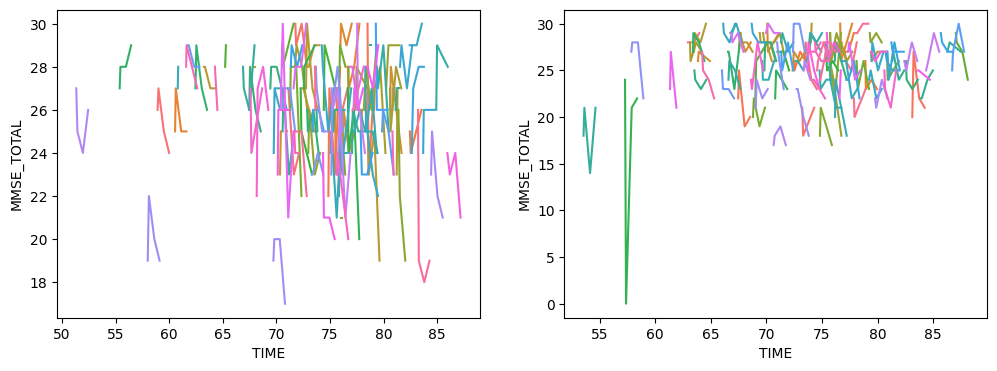

---------------------------------------- 
 ADAS13_TOTAL
----------------------------------------
Treated arm                                                            Placebo


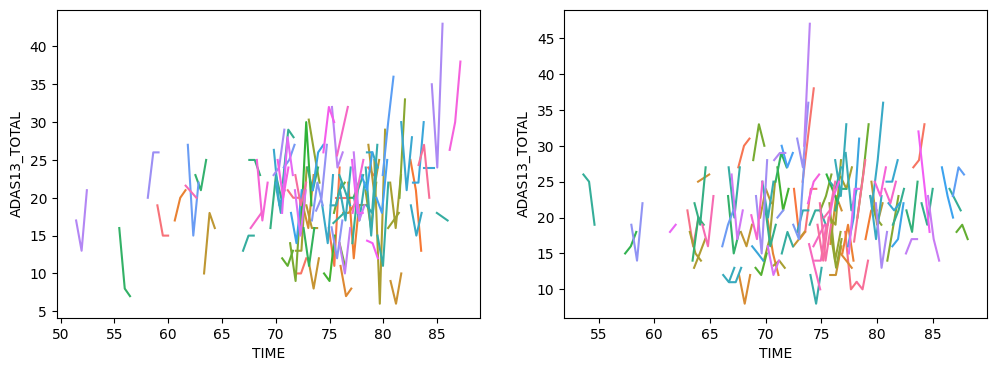

In [6]:
index_t = data_dict['Cofactors'][data_dict['Cofactors']['ARM']=='donepezil'].index.tolist()
index_c = data_dict['Cofactors'][data_dict['Cofactors']['ARM']=='placebo'].index.tolist()

for col in data_dict['MRI'].columns:
    print("-"*40, "\n", col + "\n"+ "-"*40)
    print("Treated arm"+" "*60+"Placebo")
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.lineplot(data_dict['MRI'].loc[index_t].reset_index(), x="TIME", y=col, hue="ID", ax=ax[0])
    sns.lineplot(data_dict['MRI'].loc[index_c].reset_index(), x="TIME", y=col, hue="ID", ax=ax[1])
    plt.show()

col = "MMSE_TOTAL"
print("-"*40, "\n", col + "\n"+ "-"*40)
print("Treated arm"+" "*60+"Placebo")
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data_dict['MMSE'].loc[index_t].reset_index(), x="TIME", y=col, hue="ID", ax=ax[0])
sns.lineplot(data_dict['MMSE'].loc[index_c].reset_index(), x="TIME", y=col, hue="ID", ax=ax[1])
plt.show()

col = "ADAS13_TOTAL"
print("-"*40, "\n", col + "\n"+ "-"*40)
print("Treated arm"+" "*60+"Placebo")
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data_dict['ADAS'].loc[index_t].reset_index(), x="TIME", y=col, hue="ID", ax=ax[0])
sns.lineplot(data_dict['ADAS'].loc[index_c].reset_index(), x="TIME", y=col, hue="ID", ax=ax[1])
plt.show()


Distribution of APC treated arm


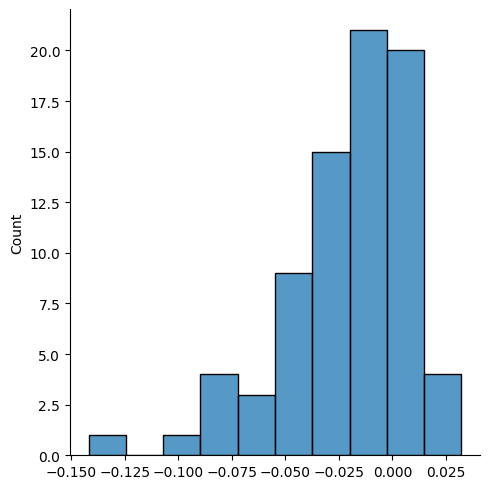

Mean -0.0196 ± 0.03

Distribution of APC placebo arm


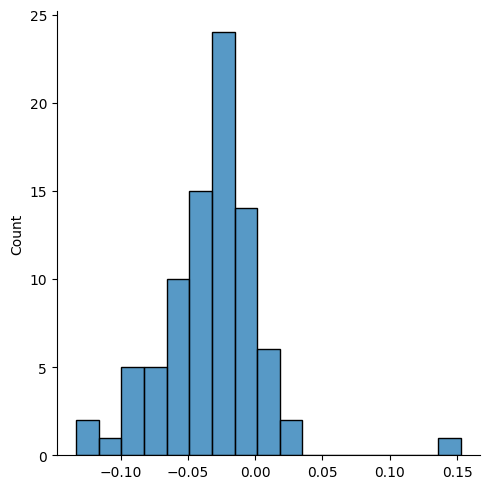

Mean -0.032 ± 0.0373


In [7]:
APC = []
for id_ in index_t+index_c:
    rows = data_dict['MRI'].loc[id_, 'MES_MRI_SACHA_HIPPOCAMPUS_VOL'].values
    if len(rows) < 2:
#        print(f"{id_} has only one measure")
        APC.append(np.nan)
    else:
        APC.append((rows[1] - rows[0])/rows[0])
APC = np.array(APC)
print("\nDistribution of APC treated arm")
sns.displot(APC[:len(index_t)])
plt.show()
print(f"Mean {np.mean(APC[:len(index_t)], where=APC[:len(index_t)]==APC[:len(index_t)]):.3} ± {np.std(APC[:len(index_t)], where=APC[:len(index_t)]==APC[:len(index_t)]):.3}")
print("\nDistribution of APC placebo arm")
sns.displot(APC[len(index_t):])
plt.show()
print(f"Mean {np.mean(APC[len(index_t):], where=APC[len(index_t):]==APC[len(index_t):]):.3} ± {np.std(APC[len(index_t):], where=APC[len(index_t):]==APC[len(index_t):]):.3}")


## 2. Training a model on ADNI

In [8]:
import sys, os

code_path = "/Users/p-e.poulet/Documents/Aramis/code/"
notebooks_path = os.path.join(code_path, "notebooks")
sys.path.append(os.path.join(code_path, 'leaspy'))

from leaspy import Leaspy, Data, AlgorithmSettings, Plotter, Dataset, IndividualParameters

from leaspy import Leaspy, Data, AlgorithmSettings, Plotter, Dataset, IndividualParameters
from leaspy.models.utils.attributes.attributes_factory import AttributesFactory
from leaspy.algo.algo_factory import AlgoFactory
from leaspy.io.settings.model_settings import ModelSettings

In [23]:
adni_path = os.path.join(code_path, "data/ADNI/ADNI_joined.csv")

adni = pd.read_csv(adni_path, sep=";")
adni.rename(columns={"RID":"ID", "AGE_vis":"TIME"}, inplace=True)
adni["ID"] = adni["ID"].astype(str)
adni.set_index(["ID", "TIME"], inplace=True)
adni

Phase VISCODE2    EXAMDATE  MES_CSF_TTAU  MES_CSF_PTAU  \
ID   TIME                                                              
2    74.300   ADNI1       bl  2005-09-08           NaN           NaN   
     74.790   ADNI1      m06  2006-03-06           NaN           NaN   
     77.268   ADNI1      m36  2008-08-27           NaN           NaN   
     79.338  ADNIGO      m60  2010-09-22           NaN           NaN   
     80.329   ADNI2      m72  2011-09-19           NaN           NaN   
...             ...      ...         ...           ...           ...   
6852 76.400   ADNI3       bl  2020-02-19           NaN           NaN   
6854 86.200   ADNI3       bl  2020-03-04           NaN           NaN   
6860 74.700   ADNI3       bl  2020-06-18           NaN           NaN   
6873 72.100   ADNI3       bl  2020-07-10           NaN           NaN   
6874 76.500   ADNI3       bl  2020-07-13           NaN           NaN   

             MES_CSF_ABETA42  MES_CSF_ABETA40  MES_PET_FDG_L_ANGULAR  \
ID   TIME                                                              
2    74.300              NaN              NaN                1.28604   
     74.790              NaN              NaN                1.27136   
     77.268              NaN              NaN                    NaN   
     79.338              NaN              NaN                    NaN   
     80.329              NaN              NaN                    NaN   
...                      ...              ...                    ...   
6852 76.400              NaN              NaN                    NaN   
6854 86.200              NaN              NaN                    NaN   
6860 74.700              NaN              NaN                    NaN   
6873 72.100              NaN              NaN                    NaN   
6874 76.500              NaN              NaN                    NaN   

             MES_PET_FDG_R_ANGULAR  MES_PET_FDG_B_CINGULAR  ...  MMSE_P3  \
ID   TIME                                                   ...            
2    74.300                1.28592                 1.57213  ...      5.0   
     74.790                1.27710                 1.20701  ...      5.0   
     77.268                    NaN                     NaN  ...      5.0   
     79.338                    NaN                     NaN  ...      5.0   
     80.329                    NaN                     NaN  ...      1.0   
...                            ...                     ...  ...      ...   
6852 76.400                    NaN                     NaN  ...      5.0   
6854 86.200                    NaN                     NaN  ...      5.0   
6860 74.700                    NaN                     NaN  ...      5.0   
6873 72.100                    NaN                     NaN  ...      5.0   
6874 76.500                    NaN                     NaN  ...      3.0   

             MMSE_P4  MMSE_P5  MMSE_P6  CDR_SOB  NPI_TOT_SEV  NPI_TOT_FREQ  \
ID   TIME                                                                    
2    74.300      1.0      2.0      3.0      0.0          NaN           NaN   
     74.790      2.0      2.0      3.0      0.0          NaN           NaN   
     77.268      2.0      2.0      3.0      0.0          NaN           NaN   
     79.338      2.0      2.0      3.0      0.0          NaN           NaN   
     80.329      1.0      2.0      3.0      0.0          0.0           0.0   
...              ...      ...      ...      ...          ...           ...   
6852 76.400      2.0      2.0      3.0      0.5          0.0           0.0   
6854 86.200      3.0      2.0      3.0      2.5          5.0           9.0   
6860 74.700      3.0      2.0      2.0      3.5          7.0          11.0   
6873 72.100      3.0      2.0      3.0      1.5          0.0           0.0   
6874 76.500      3.0      2.0      3.0      2.0          0.0           0.0   

             NPI_TOT_DISTRESS  NPI_ALL_TOT_SEV  DX_seq  
ID   TIME                                               
2    74.300           

In [24]:
# Filtering for only AD patients

alz = adni[adni['DX_seq'].astype(str).str.contains("2")]
print(pd.unique(alz["DX_seq"]))
print(alz.shape)
print("Nb ALZ ind : ", alz.index.get_level_values("ID").unique().shape[0])

[       2       12 10101012     1212      212       21      121     1012
    12101]
(4689, 363)
Nb ALZ ind :  783


In [25]:
# Filtering for nb visits >= 2

index_list = []

solo = 0
for id_ in alz.index.get_level_values("ID").unique():
    indiv = alz.loc[id_]
    nb_vis = indiv.shape[0]
    if nb_vis >= 2:
        index_list.append(id_)
    else:
        solo += 1
print("Nb ind with one visit : ", solo)
print("Nb ind retained : ", len(index_list))

Nb ind with one visit :  53
Nb ind retained :  730


In [26]:
alz_filt = alz.loc[index_list]
alz_filt

Phase VISCODE2    EXAMDATE  MES_CSF_TTAU  MES_CSF_PTAU  \
ID   TIME                                                             
3    81.300  ADNI1       bl  2005-09-12         239.7         22.83   
     81.798  ADNI1      m06  2006-03-13           NaN           NaN   
     82.299  ADNI1      m12  2006-09-12         251.7         24.18   
     83.299  ADNI1      m24  2007-09-12           NaN           NaN   
7    75.400  ADNI1       bl  2005-10-06           NaN           NaN   
...            ...      ...         ...           ...           ...   
6687 81.186  ADNI3      m12  2020-03-06           NaN           NaN   
6705 74.900  ADNI3       bl  2019-04-23           NaN           NaN   
     76.075  ADNI3      m12  2020-06-25           NaN           NaN   
6721 77.900  ADNI3       bl  2019-05-07           NaN           NaN   
     78.877  ADNI3      m12  2020-04-28           NaN           NaN   

             MES_CSF_ABETA42  MES_CSF_ABETA40  MES_PET_FDG_L_ANGULAR  \
ID   TIME                                                              
3    81.300            741.5              NaN                1.08632   
     81.798              NaN              NaN                1.03995   
     82.299            601.4              NaN                1.09909   
     83.299              NaN              NaN                1.06785   
7    75.400              NaN              NaN                    NaN   
...                      ...              ...                    ...   
6687 81.186              NaN              NaN                    NaN   
6705 74.900              NaN              NaN                1.07136   
     76.075              NaN              NaN                    NaN   
6721 77.900              NaN              NaN                1.16024   
     78.877              NaN              NaN                    NaN   

             MES_PET_FDG_R_ANGULAR  MES_PET_FDG_B_CINGULAR  ...  MMSE_P3  \
ID   TIME                                                   ...            
3    81.300                1.12519                 1.24454  ...      3.0   
     81.798                1.13170                 1.21991  ...      5.0   
     82.299                1.11531                 1.25506  ...      1.0   
     83.299                1.04247                 1.23081  ...      5.0   
7    75.400                    NaN                     NaN  ...      2.0   
...                            ...                     ...  ...      ...   
6687 81.186                    NaN                     NaN  ...      NaN   
6705 74.900                1.17135                 0.95767  ...      5.0   
     76.075                    NaN                     NaN  ...      5.0   
6721 77.900                1.24474                 1.12551  ...      5.0   
     78.877                    NaN                     NaN  ...      NaN   

             MMSE_P4  MMSE_P5  MMSE_P6  CDR_SOB  NPI_TOT_SEV  NPI_TOT_FREQ  \
ID   TIME                                                                    
3    81.300      0.0      2.0      3.0      4.5          NaN           NaN   
     81.798      0.0      2.0      3.0      6.0          NaN           NaN   
     82.299      0.0      2.0      3.0      3.5          NaN           NaN   
     83.299      0.0      2.0      3.0      8.0          NaN           NaN   
7    75.400      0.0      2.0      3.0      6.0          NaN           NaN   
...              ...      ...      ...      ...          ...           ...   
6687 81.186      NaN      NaN      NaN      4.0          1.0           1.0   
6705 74.900      3.0      2.0      2.0      6.0          3.0           5.0   
     76.075      2.0      2.0      3.0      6.0          8.0          15.0   
6721 77.900      2.0      2.0      3.0      4.0          2.0           5.0   
     78.877      NaN      NaN      NaN      5.5          1.0           1.0   

             NPI_TOT_DISTRESS  NPI_ALL_TOT_SEV  DX_seq  
ID   TIME                                               
3    81.300               NaN     

In [27]:
selected = ['MMSE_TOT', 'ADAS_TOT13', 'MES_MRI_HIPPOCAMPUS_ICV', 'MES_MRI_VENTRICLES_ICV']

alz_filt[selected].describe()

,MMSE_TOT,ADAS_TOT13,MES_MRI_HIPPOCAMPUS_ICV,MES_MRI_VENTRICLES_ICV
count,3799.000000,3623.000000,3395.000000,3392.000000
mean,23.788629,27.018054,0.003797,0.032122
std,4.706367,11.816327,0.000728,0.014110
min,0.000000,0.000000,0.001314,0.005370
25%,22.000000,19.000000,0.003279,0.021716
50%,25.000000,26.000000,0.003736,0.030116
75%,27.000000,33.330000,0.004253,0.040168
max,30.000000,85.000000,0.007265,0.090303


In [30]:
print(alz_filt[selected].describe().round(3).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  MMSE\_TOT &  ADAS\_TOT13 &  MES\_MRI\_HIPPOCAMPUS\_ICV &  MES\_MRI\_VENTRICLES\_ICV \\
\midrule
count &  3799.000 &    3623.000 &                 3395.000 &                3392.000 \\
mean  &    23.789 &      27.018 &                    0.004 &                   0.032 \\
std   &     4.706 &      11.816 &                    0.001 &                   0.014 \\
min   &     0.000 &       0.000 &                    0.001 &                   0.005 \\
25\%   &    22.000 &      19.000 &                    0.003 &                   0.022 \\
50\%   &    25.000 &      26.000 &                    0.004 &                   0.030 \\
75\%   &    27.000 &      33.330 &                    0.004 &                   0.040 \\
max   &    30.000 &      85.000 &                    0.007 &                   0.090 \\
\bottomrule
\end{tabular}



/var/folders/zd/m7jdpyld0kl1zgzslfl3xfdr0000gq/T/ipykernel_42647/2418248590.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(alz_filt[selected].describe().round(3).to_latex())


In [15]:
alz_filt_r = alz_filt[selected].copy()
for col in selected:
    alz_filt_r.loc[:, col] = alz_filt_r[col] / alz_filt_r[col].max()
alz_filt_r["MMSE_TOT"] = 1 - alz_filt_r["MMSE_TOT"]
alz_filt_r

MMSE_TOT  ADAS_TOT13  MES_MRI_HIPPOCAMPUS_ICV  \
ID   TIME                                                    
3    81.300  0.333333    0.364706                 0.381198   
     81.798  0.200000    0.352941                 0.393219   
     82.299  0.433333    0.411765                 0.372862   
     83.299  0.366667    0.443176                 0.371639   
7    75.400  0.333333    0.474471                 0.684326   
...               ...         ...                      ...   
6687 81.186       NaN         NaN                      NaN   
6705 74.900  0.166667    0.321529                 0.533472   
     76.075  0.233333    0.341176                      NaN   
6721 77.900  0.166667    0.349059                 0.458983   
     78.877       NaN         NaN                      NaN   

             MES_MRI_VENTRICLES_ICV  
ID   TIME                            
3    81.300                0.487761  
     81.798                0.514534  
     82.299                0.524075  
     83.299                0.566778  
7    75.400                0.210298  
...                             ...  
6687 81.186                     NaN  
6705 74.900                0.592429  
     76.075                     NaN  
6721 77.900                0.477058  
     78.877                     NaN  

[4636 rows x 4 columns]

In [16]:
leaspy = Leaspy("logistic", noise_model="gaussian-diagonal")

name = "PPI_for_CT_multivariate_4_items"

sampler = "Gibbs"
algo_settings = AlgorithmSettings('mcmc_saem', 
                                  n_iter=4096, 
                                  sampler_ind=sampler, 
                                  sampler_pop=sampler,
                                 )

leaspy_data = Data.from_dataframe(alz_filt_r)

dir_path = os.path.join(notebooks_path, "model_outputs/experiments_ADNI/", name)
if not os.path.exists(dir_path):
    os.mkdir(dir_path)

param_file = os.path.join(dir_path,"model_parameters.json")
if os.path.exists(param_file):
    leaspy = Leaspy.load(param_file)
else:
    log_dir = os.path.join(dir_path,"logs")
    if not os.path.isdir(log_dir):
        os.makedirs(log_dir) 
    algo_settings.set_logs(log_dir, overwrite_logs_folder=True, console_print_periodicity = 512)
    leaspy.fit(leaspy_data, algo_settings)
    leaspy.save(param_file)

settings = AlgorithmSettings('scipy_minimize', use_jacobian=True)
perso_file = os.path.join(dir_path, "personalization.csv")
if os.path.exists(perso_file):
    results = IndividualParameters.load(perso_file)
else:
    results = leaspy.personalize(leaspy_data, settings)
    results.save(perso_file)

## 3. Predictions using pre-trained model

In [9]:
name = "PPI_for_CT_multivariate_4_items"
dir_path = os.path.join(notebooks_path, "model_outputs/experiments_ADNI/", name)
param_file = os.path.join(dir_path,"model_parameters.json")
leaspy = Leaspy.load(param_file)

In [10]:
data = pd.concat([data_dict["MMSE"][["MMSE_TOTAL"]], data_dict["ADAS"][["ADAS13_TOTAL"]], data_dict["MRI"][["MES_MRI_FREESURFER_HIPPOCAMPUS_ICV", "MES_MRI_FREESURFER_VENTRICLES_ICV"]]], axis=1)
data.dropna(how="any", inplace=True)

# Only keep individuals with 2 visits
idx = []
for id_ in data.index.get_level_values("ID").unique():
    indiv = data.loc[id_]
    if indiv.shape[0]>1:
        idx.append(id_)

data = data.loc[idx]
data

MMSE_TOTAL  ADAS13_TOTAL  \
ID         TIME                               
_01_02_BEM 62.971        28.0         21.00   
           63.970        29.0         20.00   
_01_12_SUT 71.116        27.0         21.00   
           72.115        24.0         20.00   
_01_13_COG 77.133        26.0         18.00   
...                       ...           ...   
_28_07_ZES 79.176        30.0         14.00   
_29_01_SEE 71.822        25.0         23.00   
           72.821        22.0         22.00   
_30_01_BRR 83.280        19.0         24.33   
           84.279        19.0         20.00   

                   MES_MRI_FREESURFER_HIPPOCAMPUS_ICV  \
ID         TIME                                         
_01_02_BEM 62.971                            0.004738   
           63.970                            0.004637   
_01_12_SUT 71.116                            0.004776   
           72.115                            0.004518   
_01_13_COG 77.133                            0.004030   
...                                               ...   
_28_07_ZES 79.176                            0.004461   
_29_01_SEE 71.822                            0.006084   
           72.821                            0.005938   
_30_01_BRR 83.280                            0.004097   
           84.279                            0.003960   

                   MES_MRI_FREESURFER_VENTRICLES_ICV  
ID         TIME                                       
_01_02_BEM 62.971                           0.011054  
           63.970                           0.012139  
_01_12_SUT 71.116                           0.032868  
           72.115                           0.032754  
_01_13_COG 77.133                           0.029397  
...                                              ...  
_28_07_ZES 79.176                           0.024886  
_29_01_SEE 71.822                           0.018126  
           72.821                           0.019679  
_30_01_BRR 83.280                           0.037302  
           84.279                           0.038095  

[334 rows x 4 columns]

In [11]:
# Selecting only baseline data

baseline = []

for id_ in data.index.get_level_values("ID").unique():
    indiv = data.loc[id_]
    time = indiv.index.get_level_values("TIME")[0]
    baseline.append((id_, time))

data_bl = data.loc[baseline]
data_bl

,,MMSE_TOTAL,ADAS13_TOTAL,MES_MRI_FREESURFER_HIPPOCAMPUS_ICV,MES_MRI_FREESURFER_VENTRICLES_ICV
ID,TIME,,,,
_01_02_BEM,62.971,28.0,21.00,0.004738,0.011054
_01_12_SUT,71.116,27.0,21.00,0.004776,0.032868
_01_13_COG,77.133,26.0,18.00,0.004030,0.029397
_01_14_RUA,58.990,27.0,19.00,0.004895,0.012322
_01_15_ALM,73.536,28.0,18.00,0.004690,0.025187
...,...,...,...,...,...
_27_02_GIM,74.856,24.0,22.00,0.003749,0.025362
_28_06_REM,74.645,26.0,19.00,0.004787,0.018823
_28_07_ZES,78.177,29.0,11.00,0.004405,0.025550


In [16]:
data_bl.describe().round(3)

,MMSE_TOTAL,ADAS13_TOTAL,MES_MRI_FREESURFER_HIPPOCAMPUS_ICV,MES_MRI_FREESURFER_VENTRICLES_ICV
count,167.000,167.000,167.000,167.000
mean,26.048,20.191,0.004,0.026
std,3.073,5.128,0.001,0.010
min,0.000,9.000,0.003,0.006
25%,25.000,16.000,0.004,0.019
50%,27.000,20.000,0.004,0.024
75%,28.000,24.000,0.005,0.030
max,30.000,35.000,0.006,0.067


In [17]:
print(data_bl.describe().round(3).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  MMSE\_TOTAL &  ADAS13\_TOTAL &  MES\_MRI\_FREESURFER\_HIPPOCAMPUS\_ICV &  MES\_MRI\_FREESURFER\_VENTRICLES\_ICV \\
\midrule
count &     167.000 &       167.000 &                             167.000 &                            167.000 \\
mean  &      26.048 &        20.191 &                               0.004 &                              0.026 \\
std   &       3.073 &         5.128 &                               0.001 &                              0.010 \\
min   &       0.000 &         9.000 &                               0.003 &                              0.006 \\
25\%   &      25.000 &        16.000 &                               0.004 &                              0.019 \\
50\%   &      27.000 &        20.000 &                               0.004 &                              0.024 \\
75\%   &      28.000 &        24.000 &                               0.005 &                              0.030 \\
max   &      30.000 &        35.000 &

/var/folders/zd/m7jdpyld0kl1zgzslfl3xfdr0000gq/T/ipykernel_42647/2729049641.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data_bl.describe().round(3).to_latex())


In [18]:
mapper = {data_bl.columns[i]:x for i, x in enumerate(['MMSE_TOT', 'ADAS_TOT13', 'MES_MRI_HIPPOCAMPUS_ICV', 'MES_MRI_VENTRICLES_ICV'])}

max_adni = [30.000000, 85.000000, 0.007265, 0.090303]
data_bl_scaled = data_bl.copy()
for i, col in enumerate(data_bl.columns):
    data_bl_scaled.loc[:, col] = data_bl[col] / max_adni[i]

data_bl_scaled["MMSE_TOTAL"] = 1 - data_bl_scaled["MMSE_TOTAL"]

leaspy_data = Data.from_dataframe(data_bl_scaled.rename(columns=mapper))

settings = AlgorithmSettings('scipy_minimize', use_jacobian=True)
perso_file = os.path.join(dir_path, "personalization_hippocampe_trial.csv")
if os.path.exists(perso_file):
    results = IndividualParameters.load(perso_file)
else:
    results = leaspy.personalize(leaspy_data, settings)
    results.save(perso_file)

In [19]:
# Selecting only end of trial data

end_of_trial = {}
idx_eot = []

for id_ in data.index.get_level_values("ID").unique():
    indiv = data.loc[id_]
    time = indiv.index.get_level_values("TIME")[-1]
    end_of_trial[id_] = [time]
    idx_eot.append((id_, time))

eot = data.loc[idx_eot]

In [20]:
eot.describe().round(3)

,MMSE_TOTAL,ADAS13_TOTAL,MES_MRI_FREESURFER_HIPPOCAMPUS_ICV,MES_MRI_FREESURFER_VENTRICLES_ICV
count,167.000,167.000,167.000,167.000
mean,25.251,21.826,0.004,0.027
std,3.031,6.399,0.001,0.011
min,17.000,7.000,0.003,0.006
25%,23.500,18.000,0.004,0.020
50%,26.000,22.000,0.004,0.026
75%,27.000,25.000,0.005,0.033
max,30.000,47.000,0.006,0.071


In [22]:
print(eot.describe().round(3).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  MMSE\_TOTAL &  ADAS13\_TOTAL &  MES\_MRI\_FREESURFER\_HIPPOCAMPUS\_ICV &  MES\_MRI\_FREESURFER\_VENTRICLES\_ICV \\
\midrule
count &     167.000 &       167.000 &                             167.000 &                            167.000 \\
mean  &      25.251 &        21.826 &                               0.004 &                              0.027 \\
std   &       3.031 &         6.399 &                               0.001 &                              0.011 \\
min   &      17.000 &         7.000 &                               0.003 &                              0.006 \\
25\%   &      23.500 &        18.000 &                               0.004 &                              0.020 \\
50\%   &      26.000 &        22.000 &                               0.004 &                              0.026 \\
75\%   &      27.000 &        25.000 &                               0.005 &                              0.033 \\
max   &      30.000 &        47.000 &

/var/folders/zd/m7jdpyld0kl1zgzslfl3xfdr0000gq/T/ipykernel_42647/213665104.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(eot.describe().round(3).to_latex())


In [31]:
predictions = leaspy.estimate(end_of_trial, results, to_dataframe=True)
# rescaling
predictions["MMSE_TOT"] = 1 - predictions["MMSE_TOT"]
for i, col in enumerate(predictions.columns):
    predictions.loc[:, col] = predictions[col] * max_adni[i]
predictions

,,MMSE_TOT,ADAS_TOT13,MES_MRI_HIPPOCAMPUS_ICV,MES_MRI_VENTRICLES_ICV
ID,TIME,,,,
_01_02_BEM,63.970,26.867714,19.225780,0.004653,0.012444
_01_12_SUT,72.115,25.740978,23.246111,0.004644,0.034502
_01_13_COG,78.133,25.975260,22.333193,0.003995,0.031270
_01_14_RUA,59.989,27.303127,17.571997,0.004782,0.013274
_01_15_ALM,74.535,26.654079,20.068558,0.004578,0.026838
...,...,...,...,...,...
_27_02_GIM,75.855,24.530876,26.732847,0.003757,0.027245
_28_06_REM,75.644,25.964144,22.458822,0.004677,0.020483
_28_07_ZES,79.176,27.955265,14.789227,0.004322,0.027638


## 4. Computing estimators using prognostic score

n = 89	m = 78
--------------------------------------------------
MMSE_TOTAL
--------------------------------------------------
 sigma_c = 3.33, sigma_t = 1.96, sigma_f = 1.98, rho_c = 0.625, rho_t = 0.125, lambda_PPI = 0.558
--------------------------------------------------
ADAS13_TOTAL
--------------------------------------------------
 sigma_c = 5.0, sigma_t = 4.98, sigma_f = 5.91, rho_c = 0.0826, rho_t = 0.286, lambda_PPI = 0.161
--------------------------------------------------
MES_MRI_FREESURFER_HIPPOCAMPUS_ICV
--------------------------------------------------
 sigma_c = 0.000189, sigma_t = 0.000164, sigma_f = 0.000535, rho_c = -0.0142, rho_t = 0.0996, lambda_PPI = 0.014
--------------------------------------------------
MES_MRI_FREESURFER_VENTRICLES_ICV
--------------------------------------------------
 sigma_c = 0.0016, sigma_t = 0.00141, sigma_f = 0.0102, rho_c = 0.0761, rho_t = -0.087, lambda_PPI = -0.000814


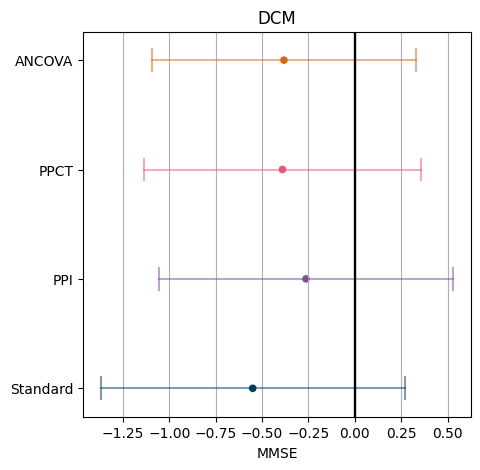

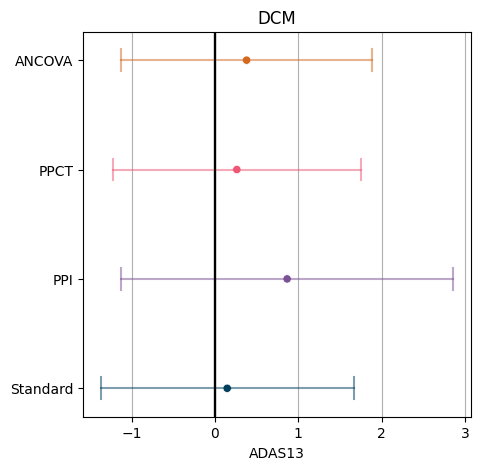

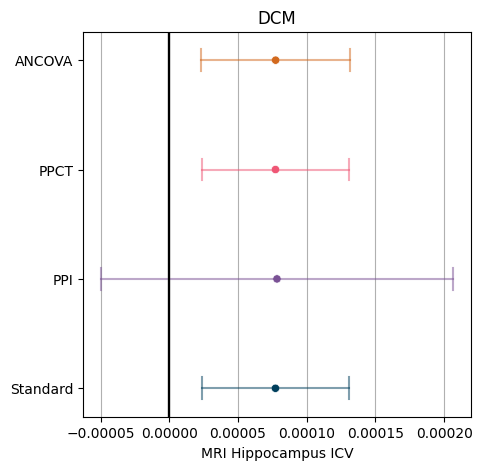

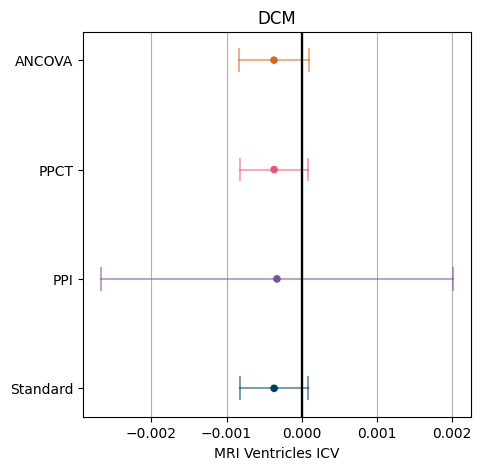

,Classical,PPI,PPI++,ANCOVAII
MMSE_TOTAL,-0.55±0.417,-0.263±0.404,-0.39±0.381,-0.382±0.363
ADAS13_TOTAL,0.147±0.774,0.867±1.02,0.263±0.76,0.38±0.768
MES_MRI_FREESURFER_HIPPOCAMPUS_ICV,7.72e-05±2.73e-05,7.83e-05±6.54e-05,7.73e-05±2.73e-05,7.73e-05±2.77e-05
MES_MRI_FREESURFER_VENTRICLES_ICV,-0.000368±0.000233,-0.00033±0.00119,-0.000368±0.000233,-0.000369±0.000236


In [65]:
# Classical :

a = np.zeros((4,4))
s = np.zeros((4,4))

N = 167
index_t = list(set(index_t) & set(predictions.index.get_level_values('ID').unique()))
m = len(index_t)
index_c = list(set(index_c) & set(predictions.index.get_level_values('ID').unique()))
n = len(index_c)
print(f"n = {n}\tm = {m}")

for i, col in enumerate(data.columns):

    col_adni = mapper[col]

    X_t = data_bl.loc[index_t][col].values
    X_c = data_bl.loc[index_c][col].values
    Y_t = eot.loc[index_t][col].values - X_t
    Y_c = eot.loc[index_c][col].values - X_c
    fX_t = predictions.loc[index_t][col_adni].values - X_t
    fX_c = predictions.loc[index_c][col_adni].values - X_c

    # Values of sigma and rho on data
    sigma_c = np.std(Y_c, ddof=1)
    sigma_t = np.std(Y_t, ddof=1)
    sigma_f = np.std(predictions[col_adni].values, ddof=1)
    sigma_delta = np.std(Y_c-fX_c, ddof=1)
    rho_t = np.corrcoef(fX_t, Y_t)[1, 0]
    rho_c = np.corrcoef(fX_c, Y_c)[1, 0]
    
    a[i, 0] = estimators.theta_classical(Y_t, Y_c) 
    s[i, 0] = estimators.var_classical(sigma_t, sigma_c, n, m)
    
    # PPI :
    
    a[i, 1] = estimators.theta_PP(Y_t, Y_c, fX_t, fX_c)
    s[i, 1] = estimators.var_PP(sigma_t, sigma_f, sigma_delta, rho_t, n, m)
    
    # PPI ++ :
    
    lambda_ = estimators.lambda_star(sigma_t, sigma_f, sigma_c, rho_t, rho_c, n, m)
    theta = estimators.theta_PP_plus(Y_t, Y_c, fX_t, fX_c, lambda_)
    var = estimators.var_PP_plus(sigma_t, sigma_f, sigma_c, rho_t, rho_c, n, m, lambda_)
    
    a[i, 2] = theta
    s[i, 2] = var

    print("-"*50+"\n"+col+"\n"+"-"*50+"\n", f"sigma_c = {sigma_c:.3}, sigma_t = {sigma_t:.3}, sigma_f = {sigma_f:.3}, rho_c = {rho_c:.3}, rho_t = {rho_t:.3}, lambda_PPI = {lambda_:.3}")

    # ANCOVA II

    X = data_bl[col].values
    Y = eot[col].values - X
    T = eot.index.get_level_values('ID').isin(index_t).astype(int)
    fX = predictions[col_adni] - X
    df = pd.DataFrame(np.array([Y, T, fX, X]).T, columns=["Y", "T", "fX", "X"])
    for col in ["T", "X", "fX"]:
        df[col] = df[col]-df[col].mean()
    theta, std = estimators.ancova_sm(df, use_covariates=False, verbose=False)
    a[i, 3] = theta
    s[i, 3] = std*std
#    print(f"Validation dérivation théorique :\tpractice={a[i,3]:.5} \t theorie={estimators.theta_ancova2_theo(Y_t, Y_c, fX_t, fX_c):.5}")

res = pd.DataFrame(a, index=data.columns, columns=["Classical", "PPI", "PPI++", "ANCOVAII"])
var = pd.DataFrame(s, index=data.columns, columns=["Classical", "PPI", "PPI++", "ANCOVAII"])

colors= ['#003f5c', '#7a5195', '#ef5675', 'chocolate']
labels = ['MMSE', 'ADAS13', 'MRI Hippocampus ICV', 'MRI Ventricles ICV']

ci_inf = res - 1.96 * np.sqrt(var)
ci_sup = res + 1.96 * np.sqrt(var)
for i, col in enumerate(data.columns):
    plt.figure(figsize=(5,5))
    sns.scatterplot(y=np.arange(4), x=res.loc[col], color=colors)
    for j in range(4):
        plt.plot([ci_inf.iloc[i, j], ci_sup.iloc[i,j]], [j,j], alpha=0.5, color=colors[j])
        plt.plot([ci_inf.iloc[i, j], ci_inf.iloc[i,j]], [j-0.1,j+0.1], alpha=0.5, color=colors[j])
        plt.plot([ci_sup.iloc[i, j], ci_sup.iloc[i,j]], [j-0.1,j+0.1], alpha=0.5, color=colors[j])
        plt.axvline(0., c='black')
    plt.yticks(np.arange(4), ['Standard', 'PPI', 'PPCT', 'ANCOVA'])
    plt.grid(axis='x')
    plt.xlabel(labels[i])
    plt.title(f"DCM")
    plt.show()

out = res.copy()

for i in range(len(data.columns)):
    for j in range(4):
        out.iloc[i, j] = f"{res.iloc[i,j]:.3}±{np.sqrt(var.iloc[i,j]):.3}"
out

In [37]:
print(var.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &     Classical &           PPI &         PPI++ &      ANCOVAII \\
\midrule
MMSE\_TOTAL                         &  1.742326e-01 &  1.633945e-01 &  1.448978e-01 &  1.319217e-01 \\
ADAS13\_TOTAL                       &  5.989912e-01 &  1.033448e+00 &  5.772303e-01 &  5.891589e-01 \\
MES\_MRI\_FREESURFER\_HIPPOCAMPUS\_ICV &  7.471463e-10 &  4.273973e-09 &  7.458056e-10 &  7.673714e-10 \\
MES\_MRI\_FREESURFER\_VENTRICLES\_ICV  &  5.418925e-08 &  1.426830e-06 &  5.418759e-08 &  5.558468e-08 \\
\bottomrule
\end{tabular}



/var/folders/zd/m7jdpyld0kl1zgzslfl3xfdr0000gq/T/ipykernel_42647/3371894647.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(var.to_latex())


## 5. Computing estimators with other prognostic scores

We will use the predictions from the models developped in Bruno's team.

In [66]:
preds_ock2 = pd.read_csv(os.path.join(data_path, "bruno_predictions", "results_OCK_2.csv"))
preds_ock2.rename(columns={'id':'ID', 't':'TIME', 'X1':'MMSE_TOT', 'X2':'ADAS_TOT13',  'X3':'MES_MRI_HIPPOCAMPUS_ICV', 'X4':'MES_MRI_VENTRICLES_ICV'}, inplace=True)
preds_ock
preds_ock2.set_index(['ID', 'TIME'], inplace=True)
preds_ock2

Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
ID         TIME                                                         
_01_02_BEM 63.0             0          2987          2987        4621   
           64.0             1          2988          2988        4622   
_01_12_SUT 71.1             2          2989          2989        4623   
           72.1             3          2990          2990        4624   
_01_13_COG 77.1             4          2991          2991        4625   
...                       ...           ...           ...         ...   
_28_07_ZES 79.2           329          3316          3316        4950   
_29_01_SEE 71.8           330          3317          3317        4951   
           72.8           331          3318          3318        4952   
_30_01_BRR 83.3           332          3319          3319        4953   
           84.3           333          3320          3320        4954   

                  MMSE_TOT  ADAS_TOT13  MES_MRI_HIPPOCAMPUS_ICV  \
ID         TIME                                                   
_01_02_BEM 63.0  28.000000   21.000000                 0.004738   
           64.0  27.498380   22.638512                 0.004631   
_01_12_SUT 71.1  27.000000   21.000000                 0.004776   
           72.1  26.247180   23.312982                 0.004670   
_01_13_COG 77.1  26.000000   18.000000                 0.004030   
...                    ...         ...                      ...   
_28_07_ZES 79.2  28.565564   12.607020                 0.004306   
_29_01_SEE 71.8  25.000000   23.000000                 0.006084   
           72.8  24.711867   23.965366                 0.006026   
_30_01_BRR 83.3  19.000000   24.330000                 0.004097   
           84.3  17.543076   27.791434                 0.003998   

                 MES_MRI_VENTRICLES_ICV  TRAIN  VALIDATE  TEST  theId  
ID         TIME                                                        
_01_02_BEM 63.0                0.011054  False     False  True      0  
           64.0                0.012323  False     False  True      0  
_01_12_SUT 71.1                0.032868  False     False  True      1  
           72.1                0.034886  False     False  True      1  
_01_13_COG 77.1                0.029397  False     False  True      2  
...                                 ...    ...       ...   ...    ...  
_28_07_ZES 79.2                0.027216  False     False  True    164  
_29_01_SEE 71.8                0.018126  False     False  True    165  
           72.8                0.018853  False     False  True    165  
_30_01_BRR 83.3                0.037302  False     False  True    166  
           84.3                0.039643  False     False  True    166  

[334 rows x 12 columns]

In [67]:
# Selecting timepoints for the end of trial

ind = []
for id_, time in eot.index:
    indiv = preds_ock2.loc[id_]
    best = np.argmin(np.abs(indiv.index.to_numpy() - time))
    ind.append((id_, indiv.index[best]))

preds_ock_end2 = preds_ock2.loc[ind]
preds_ock_end2

,,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,MMSE_TOT,ADAS_TOT13,MES_MRI_HIPPOCAMPUS_ICV,MES_MRI_VENTRICLES_ICV,TRAIN,VALIDATE,TEST,theId
ID,TIME,,,,,,,,,,,,
_01_02_BEM,64.0,1,2988,2988,4622,27.498380,22.638512,0.004631,0.012323,False,False,True,0
_01_12_SUT,72.1,3,2990,2990,4624,26.247180,23.312982,0.004670,0.034886,False,False,True,1
_01_13_COG,78.1,5,2992,2992,4626,25.081407,20.737192,0.003905,0.031730,False,False,True,2
_01_14_RUA,60.0,7,2994,2994,4628,26.511493,20.635198,0.004789,0.013605,False,False,True,3
_01_15_ALM,74.5,9,2996,2996,4630,27.393246,19.995012,0.004578,0.026980,False,False,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
_27_02_GIM,75.9,325,3312,3312,4946,22.803008,25.211575,0.003615,0.027712,False,False,True,162
_28_06_REM,75.6,327,3314,3314,4948,25.349182,21.072508,0.004671,0.020459,False,False,True,163
_28_07_ZES,79.2,329,3316,3316,4950,28.565564,12.607020,0.004306,0.027216,False,False,True,164


n = 89	m = 78
--------------------------------------------------
MMSE_TOTAL
--------------------------------------------------
 sigma_c = 3.33, sigma_t = 1.96, sigma_f = 1.98, rho_c = 0.228, rho_t = -0.107, lambda_PPI = 0.123
--------------------------------------------------
ADAS13_TOTAL
--------------------------------------------------
 sigma_c = 5.0, sigma_t = 4.98, sigma_f = 5.91, rho_c = 0.0174, rho_t = -0.0958, lambda_PPI = -0.0362
--------------------------------------------------
MES_MRI_FREESURFER_HIPPOCAMPUS_ICV
--------------------------------------------------
 sigma_c = 0.000189, sigma_t = 0.000164, sigma_f = 0.000535, rho_c = 0.059, rho_t = -0.0187, lambda_PPI = 0.00669
--------------------------------------------------
MES_MRI_FREESURFER_VENTRICLES_ICV
--------------------------------------------------
 sigma_c = 0.0016, sigma_t = 0.00141, sigma_f = 0.0102, rho_c = 0.337, rho_t = 0.375, lambda_PPI = 0.0522


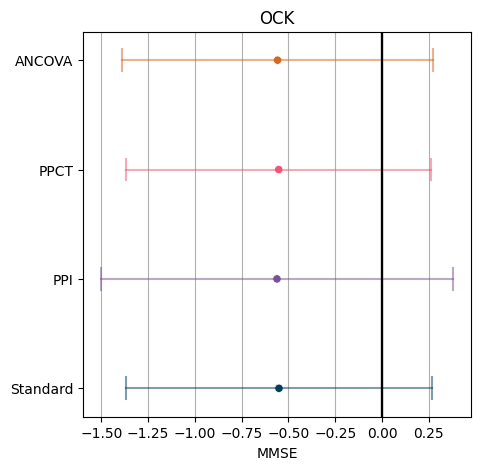

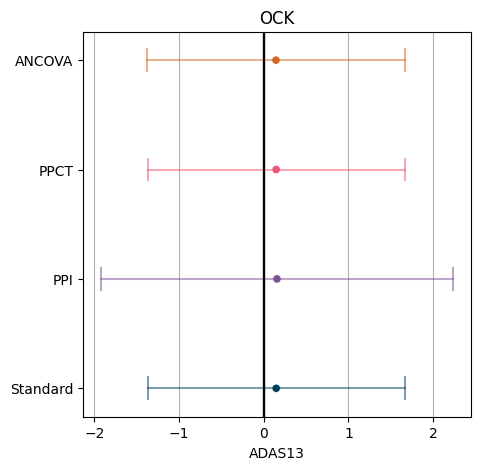

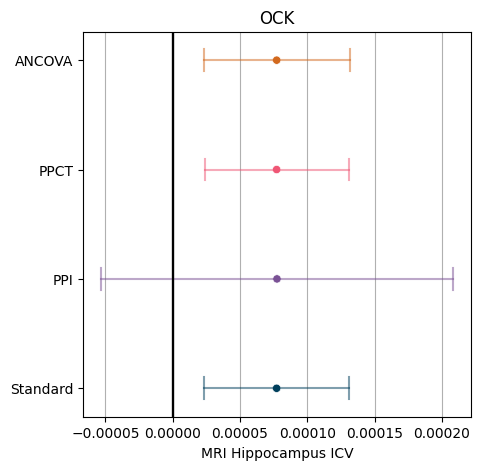

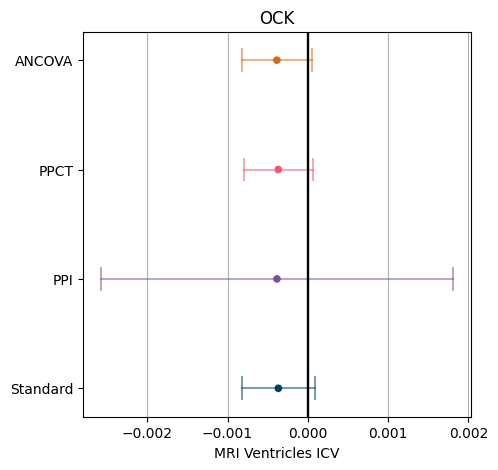

,Classical,PPI,PPI++,ANCOVAII
MMSE_TOTAL,-0.55±0.417,-0.561±0.48,-0.552±0.416,-0.558±0.424
ADAS13_TOTAL,0.147±0.774,0.156±1.06,0.147±0.773,0.144±0.777
MES_MRI_FREESURFER_HIPPOCAMPUS_ICV,7.72e-05±2.73e-05,7.75e-05±6.68e-05,7.72e-05±2.73e-05,7.73e-05±2.77e-05
MES_MRI_FREESURFER_VENTRICLES_ICV,-0.000368±0.000233,-0.000385±0.00112,-0.000368±0.000218,-0.000386±0.000221


In [68]:
# Computing ATE estimators using OCK predictions

# Classical :

a = np.zeros((4,4))
s = np.zeros((4,4))

N = 167
index_t = list(set(index_t) & set(predictions.index.get_level_values('ID').unique()))
m = len(index_t)
index_c = list(set(index_c) & set(predictions.index.get_level_values('ID').unique()))
n = len(index_c)
print(f"n = {n}\tm = {m}")

for i, col in enumerate(data.columns):

    col_adni = mapper[col]

    X_t = data_bl.loc[index_t][col].values
    X_c = data_bl.loc[index_c][col].values
    Y_t = eot.loc[index_t][col].values - X_t
    Y_c = eot.loc[index_c][col].values - X_c
    fX_t = preds_ock_end2.loc[index_t][col_adni].values - X_t
    fX_c = preds_ock_end2.loc[index_c][col_adni].values - X_c

    # Values of sigma and rho on data
    sigma_c = np.std(Y_c, ddof=1)
    sigma_t = np.std(Y_t, ddof=1)
    sigma_f = np.std(predictions[col_adni].values, ddof=1)
    sigma_delta = np.std(Y_c-fX_c, ddof=1)
    rho_t = np.corrcoef(fX_t, Y_t)[1, 0]
    rho_c = np.corrcoef(fX_c, Y_c)[1, 0]
    
    a[i, 0] = estimators.theta_classical(Y_t, Y_c) 
    s[i, 0] = estimators.var_classical(sigma_t, sigma_c, n, m)
    
    # PPI :
    
    a[i, 1] = estimators.theta_PP(Y_t, Y_c, fX_t, fX_c)
    s[i, 1] = estimators.var_PP(sigma_t, sigma_f, sigma_delta, rho_t, n, m)
    
    # PPI ++ :
    
    lambda_ = estimators.lambda_star(sigma_t, sigma_f, sigma_c, rho_t, rho_c, n, m)
    theta = estimators.theta_PP_plus(Y_t, Y_c, fX_t, fX_c, lambda_)
    var = estimators.var_PP_plus(sigma_t, sigma_f, sigma_c, rho_t, rho_c, n, m, lambda_)
    
    a[i, 2] = theta
    s[i, 2] = var

    print("-"*50+"\n"+col+"\n"+"-"*50+"\n", f"sigma_c = {sigma_c:.3}, sigma_t = {sigma_t:.3}, sigma_f = {sigma_f:.3}, rho_c = {rho_c:.3}, rho_t = {rho_t:.3}, lambda_PPI = {lambda_:.3}")

    # ANCOVA II

    X = data_bl[col].values
    Y = eot[col].values - X
    T = eot.index.get_level_values('ID').isin(index_t).astype(int)
    fX = preds_ock_end2[col_adni] - X
    df = pd.DataFrame(np.array([Y, T, fX, X]).T, columns=["Y", "T", "fX", "X"])
    for col in ["T", "X", "fX"]:
        df[col] = df[col]-df[col].mean()
    theta, std = estimators.ancova_sm(df, use_covariates=False, verbose=False)
    a[i, 3] = theta
    s[i, 3] = std*std
#    print(f"Validation dérivation théorique :\tpractice={a[i,3]:.5} \t theorie={estimators.theta_ancova2_theo(Y_t, Y_c, fX_t, fX_c):.5}")

res = pd.DataFrame(a, index=data.columns, columns=["Classical", "PPI", "PPI++", "ANCOVAII"])
var = pd.DataFrame(s, index=data.columns, columns=["Classical", "PPI", "PPI++", "ANCOVAII"])

colors= ['#003f5c', '#7a5195', '#ef5675', 'chocolate']

ci_inf = res - 1.96 * np.sqrt(var)
ci_sup = res + 1.96 * np.sqrt(var)
for i, col in enumerate(data.columns):
    plt.figure(figsize=(5,5))
    sns.scatterplot(y=np.arange(4), x=res.loc[col], color=colors)
    for j in range(4):
        plt.plot([ci_inf.iloc[i, j], ci_sup.iloc[i,j]], [j,j], alpha=0.5, color=colors[j])
        plt.plot([ci_inf.iloc[i, j], ci_inf.iloc[i,j]], [j-0.1,j+0.1], alpha=0.5, color=colors[j])
        plt.plot([ci_sup.iloc[i, j], ci_sup.iloc[i,j]], [j-0.1,j+0.1], alpha=0.5, color=colors[j])
        plt.axvline(0., c='black')
    plt.yticks(np.arange(4), ['Standard', 'PPI', 'PPCT', 'ANCOVA'])
    plt.grid(axis='x')
    plt.xlabel(labels[i])
    plt.title(f"OCK")
    plt.show()


out = res.copy()

for i in range(len(data.columns)):
    for j in range(4):
        out.iloc[i, j] = f"{res.iloc[i,j]:.3}±{np.sqrt(var.iloc[i,j]):.3}"
out

In [49]:
print(var.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &     Classical &           PPI &         PPI++ &      ANCOVAII \\
\midrule
MMSE\_TOTAL                         &  1.742326e-01 &  2.306038e-01 &  1.728064e-01 &  1.801602e-01 \\
ADAS13\_TOTAL                       &  5.989912e-01 &  1.124768e+00 &  5.978913e-01 &  6.039025e-01 \\
MES\_MRI\_FREESURFER\_HIPPOCAMPUS\_ICV &  7.471463e-10 &  4.455599e-09 &  7.468386e-10 &  7.687737e-10 \\
MES\_MRI\_FREESURFER\_VENTRICLES\_ICV  &  5.418925e-08 &  1.252552e-06 &  4.735068e-08 &  4.886269e-08 \\
\bottomrule
\end{tabular}



/var/folders/zd/m7jdpyld0kl1zgzslfl3xfdr0000gq/T/ipykernel_42647/3371894647.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(var.to_latex())


In [50]:
# Now with the last method

preds_lag2 = pd.read_csv(os.path.join(data_path, "bruno_predictions", "ADNI_trajectories_Augmented_Lagrangian_2.csv"))
preds_lag2.set_index(['ID', 'TIME'], inplace=True)
preds_lag2

MMSE_TOT  ADAS_TOT13  MES_MRI_HIPPOCAMPUS_ICV  \
ID         TIME                                                   
_01_02_BEM 63.0  28.000000   21.000000                 0.004738   
           64.0  26.994079   23.894251                 0.004595   
_01_12_SUT 71.1  27.000000   21.000000                 0.004776   
           72.1  25.985954   23.762010                 0.004646   
_01_13_COG 77.1  26.000000   18.000000                 0.004030   
...                    ...         ...                      ...   
_28_07_ZES 79.2  28.318635   13.404400                 0.004280   
_29_01_SEE 71.8  25.000000   23.000000                 0.006084   
           72.8  23.687979   26.346450                 0.005947   
_30_01_BRR 83.3  19.000000   24.330000                 0.004097   
           84.3  17.051667   28.426685                 0.003982   

                 MES_MRI_VENTRICLES_ICV  
ID         TIME                          
_01_02_BEM 63.0                0.011054  
           64.0                0.013244  
_01_12_SUT 71.1                0.032868  
           72.1                0.035124  
_01_13_COG 77.1                0.029397  
...                                 ...  
_28_07_ZES 79.2                0.027635  
_29_01_SEE 71.8                0.018126  
           72.8                0.020284  
_30_01_BRR 83.3                0.037302  
           84.3                0.039786  

[334 rows x 4 columns]

In [51]:
ind = []
for id_, time in eot.index:
    indiv = preds_lag2.loc[id_]
    best = np.argmin(np.abs(indiv.index.to_numpy() - time))
    ind.append((id_, indiv.index[best]))

preds_lag_end2 = preds_lag2.loc[ind]
preds_lag_end2

,,MMSE_TOT,ADAS_TOT13,MES_MRI_HIPPOCAMPUS_ICV,MES_MRI_VENTRICLES_ICV
ID,TIME,,,,
_01_02_BEM,64.0,26.994079,23.894251,0.004595,0.013244
_01_12_SUT,72.1,25.985954,23.762010,0.004646,0.035124
_01_13_COG,78.1,25.144825,20.552809,0.003905,0.031624
_01_14_RUA,60.0,25.991060,21.988130,0.004750,0.014527
_01_15_ALM,74.5,27.130087,20.652142,0.004554,0.027397
...,...,...,...,...,...
_27_02_GIM,75.9,22.879496,24.917906,0.003622,0.027671
_28_06_REM,75.6,25.002741,21.951740,0.004642,0.021086
_28_07_ZES,79.2,28.318635,13.404400,0.004280,0.027635


n = 89	m = 78
--------------------------------------------------
MMSE_TOTAL
--------------------------------------------------
 sigma_c = 3.33, sigma_t = 1.96, sigma_f = 1.98, rho_c = -0.0812, rho_t = 0.058, lambda_PPI = -0.0333
--------------------------------------------------
ADAS13_TOTAL
--------------------------------------------------
 sigma_c = 5.0, sigma_t = 4.98, sigma_f = 5.91, rho_c = -0.0813, rho_t = -0.221, lambda_PPI = -0.131
--------------------------------------------------
MES_MRI_FREESURFER_HIPPOCAMPUS_ICV
--------------------------------------------------
 sigma_c = 0.000189, sigma_t = 0.000164, sigma_f = 0.000535, rho_c = 0.022, rho_t = -0.024, lambda_PPI = -0.00028
--------------------------------------------------
MES_MRI_FREESURFER_VENTRICLES_ICV
--------------------------------------------------
 sigma_c = 0.0016, sigma_t = 0.00141, sigma_f = 0.0102, rho_c = 0.0839, rho_t = 0.00762, lambda_PPI = 0.0067


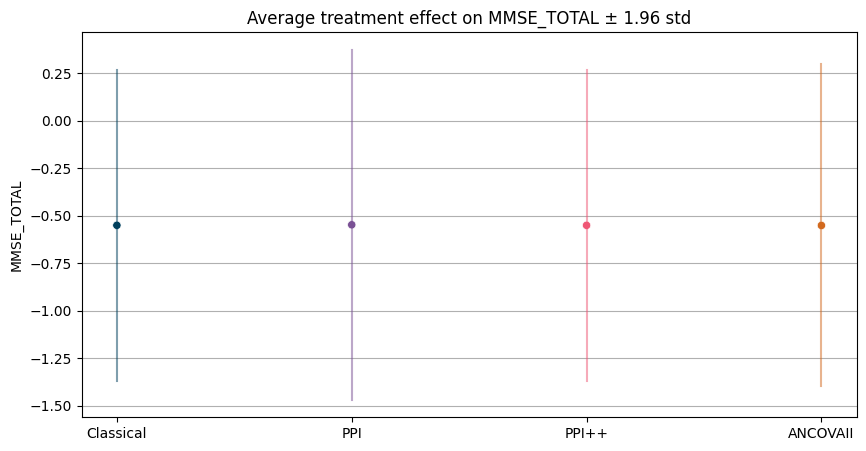

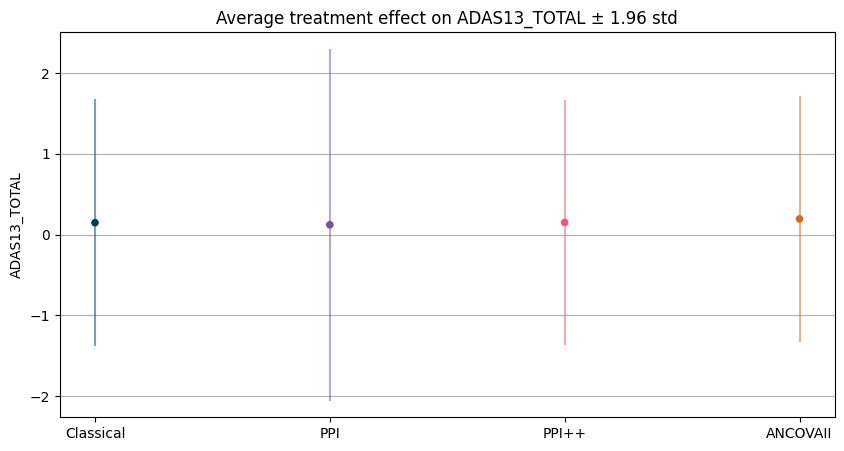

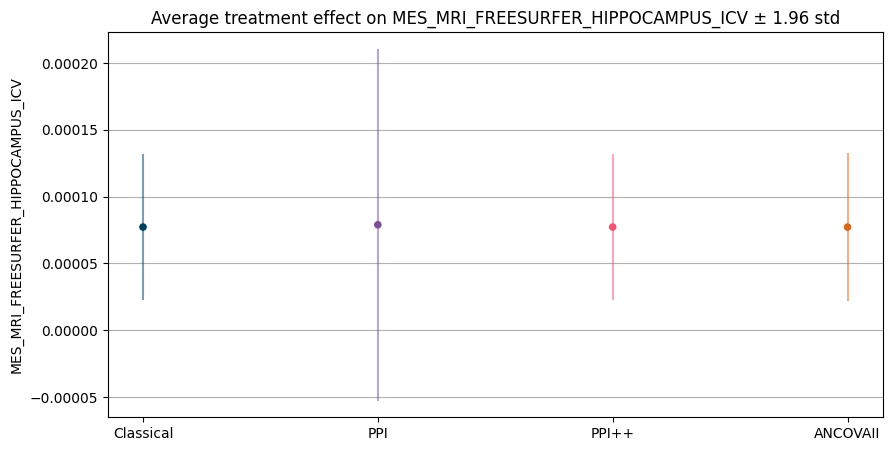

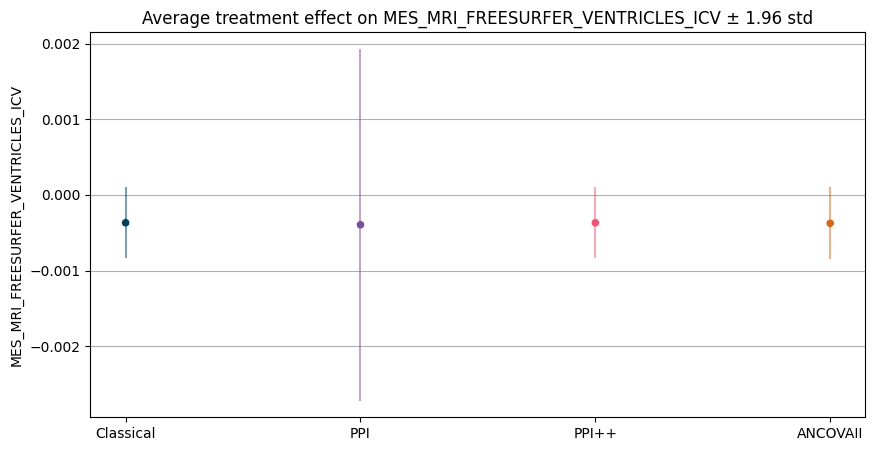

,Classical,PPI,PPI++,ANCOVAII
MMSE_TOTAL,-0.55±0.417,-0.548±0.47,-0.551±0.417,-0.551±0.432
ADAS13_TOTAL,0.147±0.774,0.122±1.1,0.151±0.765,0.194±0.769
MES_MRI_FREESURFER_HIPPOCAMPUS_ICV,7.72e-05±2.73e-05,7.89e-05±6.69e-05,7.72e-05±2.73e-05,7.72e-05±2.78e-05
MES_MRI_FREESURFER_VENTRICLES_ICV,-0.000368±0.000233,-0.000394±0.00118,-0.000368±0.000233,-0.000375±0.000236


In [52]:
# Computing ATE estimators using Augmented Lagrangian predictions

# Classical :

a = np.zeros((4,4))
s = np.zeros((4,4))

N = 167
index_t = list(set(index_t) & set(predictions.index.get_level_values('ID').unique()))
m = len(index_t)
index_c = list(set(index_c) & set(predictions.index.get_level_values('ID').unique()))
n = len(index_c)
print(f"n = {n}\tm = {m}")

for i, col in enumerate(data.columns):

    col_adni = mapper[col]

    X_t = data_bl.loc[index_t][col].values
    X_c = data_bl.loc[index_c][col].values
    Y_t = eot.loc[index_t][col].values - X_t
    Y_c = eot.loc[index_c][col].values - X_c
    fX_t = preds_lag_end2.loc[index_t][col_adni].values - X_t
    fX_c = preds_lag_end2.loc[index_c][col_adni].values - X_c

    # Values of sigma and rho on data
    sigma_c = np.std(Y_c, ddof=1)
    sigma_t = np.std(Y_t, ddof=1)
    sigma_f = np.std(predictions[col_adni].values, ddof=1)
    sigma_delta = np.std(Y_c-fX_c, ddof=1)
    rho_t = np.corrcoef(fX_t, Y_t)[1, 0]
    rho_c = np.corrcoef(fX_c, Y_c)[1, 0]
    
    a[i, 0] = estimators.theta_classical(Y_t, Y_c) 
    s[i, 0] = estimators.var_classical(sigma_t, sigma_c, n, m)
    
    # PPI :
    
    a[i, 1] = estimators.theta_PP(Y_t, Y_c, fX_t, fX_c)
    s[i, 1] = estimators.var_PP(sigma_t, sigma_f, sigma_delta, rho_t, n, m)
    
    # PPI ++ :
    
    lambda_ = estimators.lambda_star(sigma_t, sigma_f, sigma_c, rho_t, rho_c, n, m)
    theta = estimators.theta_PP_plus(Y_t, Y_c, fX_t, fX_c, lambda_)
    var = estimators.var_PP_plus(sigma_t, sigma_f, sigma_c, rho_t, rho_c, n, m, lambda_)
    
    a[i, 2] = theta
    s[i, 2] = var

    print("-"*50+"\n"+col+"\n"+"-"*50+"\n", f"sigma_c = {sigma_c:.3}, sigma_t = {sigma_t:.3}, sigma_f = {sigma_f:.3}, rho_c = {rho_c:.3}, rho_t = {rho_t:.3}, lambda_PPI = {lambda_:.3}")

    # ANCOVA II

    X = data_bl[col].values
    Y = eot[col].values - X
    T = eot.index.get_level_values('ID').isin(index_t).astype(int)
    fX = preds_lag_end2[col_adni] - X
    df = pd.DataFrame(np.array([Y, T, fX, X]).T, columns=["Y", "T", "fX", "X"])
    for col in ["T", "X", "fX"]:
        df[col] = df[col]-df[col].mean()
    theta, std = estimators.ancova_sm(df, use_covariates=False, verbose=False)
    a[i, 3] = theta
    s[i, 3] = std*std
#    print(f"Validation dérivation théorique :\tpractice={a[i,3]:.5} \t theorie={estimators.theta_ancova2_theo(Y_t, Y_c, fX_t, fX_c):.5}")

res = pd.DataFrame(a, index=data.columns, columns=["Classical", "PPI", "PPI++", "ANCOVAII"])
var = pd.DataFrame(s, index=data.columns, columns=["Classical", "PPI", "PPI++", "ANCOVAII"])

colors= ['#003f5c', '#7a5195', '#ef5675', 'chocolate']

ci_inf = res - 1.96 * np.sqrt(var)
ci_sup = res + 1.96 * np.sqrt(var)
for i, col in enumerate(data.columns):
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=np.arange(4), y=res.loc[col], color=colors)
    for j in range(4):
        plt.plot([j,j], [ci_inf.iloc[i, j], ci_sup.iloc[i,j]], alpha=0.5, color=colors[j])
    plt.xticks(np.arange(4), res.columns)
    plt.grid(axis='y')
    plt.title(f"Average treatment effect on {col} ± 1.96 std")
    plt.show()

out = res.copy()

for i in range(len(data.columns)):
    for j in range(4):
        out.iloc[i, j] = f"{res.iloc[i,j]:.3}±{np.sqrt(var.iloc[i,j]):.3}"
out

In [53]:
print(var.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &     Classical &           PPI &         PPI++ &      ANCOVAII \\
\midrule
MMSE\_TOTAL                         &  1.742326e-01 &  2.209098e-01 &  1.741284e-01 &  1.870025e-01 \\
ADAS13\_TOTAL                       &  5.989912e-01 &  1.220821e+00 &  5.845264e-01 &  5.912177e-01 \\
MES\_MRI\_FREESURFER\_HIPPOCAMPUS\_ICV &  7.471463e-10 &  4.469100e-09 &  7.471458e-10 &  7.718355e-10 \\
MES\_MRI\_FREESURFER\_VENTRICLES\_ICV  &  5.418925e-08 &  1.391290e-06 &  5.407653e-08 &  5.576677e-08 \\
\bottomrule
\end{tabular}



/var/folders/zd/m7jdpyld0kl1zgzslfl3xfdr0000gq/T/ipykernel_42647/3371894647.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(var.to_latex())


## 7. Prognostic scores comparison

In [48]:
dfs = {}
treatment = eot.index.get_level_values('ID').isin(index_t)
for col in data.columns:
    dfs[col] = pd.DataFrame(np.array([data_bl[col].values, eot[col].values, treatment, predictions[mapper[col]].values, 
                                      preds_ock_end[mapper[col]].values, preds_lag_end[mapper[col]].values,
                                      preds_ock_end2[mapper[col]].values, preds_lag_end2[mapper[col]].values]).T, 
                            index=eot.index, 
                            columns=["BL", "Endpoint", "Treatment", "Leaspy", "OCK", "Augmented Lagrangian", "OCK 2", "Augmented Lagrangian 2"])
    for var in ["Endpoint", "Leaspy", "OCK", "Augmented Lagrangian", "OCK 2", "Augmented Lagrangian 2"]:
        dfs[col][f"{var}_change"] = dfs[col][var] - dfs[col]["BL"]
dfs["MMSE_TOTAL"]

,,BL,Endpoint,Treatment,Leaspy,OCK,Augmented Lagrangian,OCK 2,Augmented Lagrangian 2,Endpoint_change,Leaspy_change,OCK_change,Augmented Lagrangian_change,OCK 2_change,Augmented Lagrangian 2_change
ID,TIME,,,,,,,,,,,,,,
_01_02_BEM,63.970,28.0,29.0,0.0,26.867714,27.195181,27.288688,27.498380,26.994079,1.0,-1.132286,-0.804819,-0.711312,-0.501620,-1.005921
_01_12_SUT,72.115,27.0,24.0,1.0,25.740978,26.187266,26.133846,26.247180,25.985954,-3.0,-1.259022,-0.812734,-0.866154,-0.752820,-1.014046
_01_13_COG,78.133,26.0,28.0,0.0,25.975260,25.182864,25.228379,25.081407,25.144825,2.0,-0.024740,-0.817136,-0.771621,-0.918593,-0.855175
_01_14_RUA,59.989,27.0,24.0,1.0,27.303127,26.195304,26.310664,26.511493,25.991060,-3.0,0.303127,-0.804696,-0.689336,-0.488507,-1.008940
_01_15_ALM,74.535,28.0,23.0,0.0,26.654079,27.191576,27.420211,27.393246,27.130087,-5.0,-1.345921,-0.808424,-0.579789,-0.606754,-0.869913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_27_02_GIM,75.855,24.0,27.0,0.0,24.530876,23.178638,22.747158,22.803008,22.879496,3.0,0.530876,-0.821362,-1.252842,-1.196992,-1.120504
_28_06_REM,75.644,26.0,26.0,0.0,25.964144,25.190191,25.252727,25.349182,25.002741,0.0,-0.035856,-0.809809,-0.747273,-0.650818,-0.997259
_28_07_ZES,79.176,29.0,30.0,0.0,27.955265,28.196686,28.679180,28.565564,28.318635,1.0,-1.044735,-0.803314,-0.320820,-0.434436,-0.681365


In [49]:
target = "Endpoint_change"

def correlation(comp, prognostic):
    return np.corrcoef(comp, prognostic)[0, 1]

def r2(comp, prognostic):
    return np.corrcoef(comp, prognostic)[0, 1]**2

def mean_error(comp, prognostic):
    return (comp - prognostic).mean()

def mae(comp, prognostic):
    return np.abs(comp-prognostic).mean()

def mse(comp, prognostic):
    return np.sqrt(((comp-prognostic)**2).mean())

metrics = [mean_error, mae, mse, correlation, r2]
names = ["Mean error", "MAE", "MSE", "Correlation", "R2"]

for col in data.columns:
    print("-"*50+"\n"+col+"\n"+"-"*50+"\n")
    res = []
    idx = []
    t = dfs[col][target]
    trt = dfs[col]["Treatment"].astype(bool)
    df_ = dfs[col].drop(columns=["Treatment", "Endpoint", "Endpoint_change"])
    res = []
    for i, metric in enumerate(metrics):
        res.append(df_.apply(lambda col : metric(t, col), axis=0))
        res.append(df_[trt].apply(lambda col : metric(t[trt], col), axis=0))
        res.append(df_[~trt].apply(lambda col : metric(t[~trt], col), axis=0))
        idx += [names[i], names[i] + " treated", names[i] + " placebo"]

    out = pd.DataFrame(res, index=idx, columns = df_.columns)
    print(out.T)

--------------------------------------------------
MMSE_TOTAL
--------------------------------------------------

                               Mean error  Mean error treated  \
BL                             -26.844311          -27.448718   
Leaspy                         -26.348824          -26.800237   
OCK                            -26.048279          -26.646349   
Augmented Lagrangian           -25.928194          -26.535562   
OCK 2                          -26.070286          -26.680419   
Augmented Lagrangian 2         -25.832557          -26.435438   
Leaspy_change                   -0.300920           -0.441263   
OCK_change                      -0.000375           -0.287374   
Augmented Lagrangian_change      0.119710           -0.176588   
OCK 2_change                    -0.022382           -0.321445   
Augmented Lagrangian 2_change    0.215347           -0.076463   

                               Mean error placebo        MAE  MAE treated  \
BL                          